<a href="https://colab.research.google.com/github/amal2334/Churn-Prediction/blob/main/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**:
- **Objective**: Study a classification problem focused on churn prediction.

- **Steps:**

  - Load the dataset.

  - Understand the dataset using statistical methods.

  - Preprocess the data.

  - Visualize the data through plots.

  - Perform data encoding.

  - Analyze correlations within the dataset.

- **Model Selection:**

  - Implement four algorithms:

  - K-Nearest Neighbors (KNN).

  - Logistic Regression.

  - Support Vector Machine (SVM).

  - XGBoost Classifier.

- **Evaluation:**

  - Assess model performance using appropriate metrics.






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('churn.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# **Note:**
- the dataset contain 12 columns:
 -  **custunoer_id**: a unique identifier for each customer
 - **Credit_score**: a numerical score representing the customer's creditworthiness
 - **country**: the coutry where the customer resides
 - **gender**: the customer's gender
 - **age** : the customer;s age in years
 - **Tenure** : the number of years the customer has been with the bank
 - **balance**: the customer;s account balance
 - **product_number**: the number of products the customer has with the bank
 - **credit_card**: indicates whether the customer has a credit card (1 for yes and 0 for no )
 - **active_number**: indicates whether the customer is an active member (1 for yes and 0 for no )
 - **estimated_salary:** the customer's estimated salary
 - **churn** : the target variable indicatig whether the customer churned (1 for churned , 0 for not churned)

In [ ]:
data.isnull().sum()


,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Note:**
- the **customer_id** contain exponential values( the mean ,standard deviation ,min ,max) ,it is not meaningful , that we are going to drop this column .
- the credit scores are  reasonably distributed , with a mean around 650 , the range is fron 350 to 850 , suggesting a typical credit score scale .
- the **average age** is around 39 with a standard deviation of about 10 , the age range is quite broad , from 18 to 92 ,indicating a diverse customer base
- the **average tenure** is about 5 years , the range is from 0 to 10 years , suggesting a wide variety of customer loyalty levels .
-  the balance shows a wide range and a high standard deviation , indicating significant variability , Notice thta 25% of customers have  a balance of 0 , which is  SIGNIFICANT observation
- **most customers have a 1 or 2 products** , the distribution is skewed towards lower values .
- About **71% of customers** have a **credit card** .
- Roughly **52% of customers** are **active members**.
- the estimated slaries are quite varied , with a wide range and a high standard deviation.
- the **churn column tells us that 20.37% of customers in the datset have churned** .

In [ ]:
data.drop('customer_id',axis=1,inplace=True)

In [ ]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.churn.value_counts()

,count
churn,
0,7963
1,2037


# **Note**:
 - 7963 customers did not churn
 - 2037 customers churned

# **Data Visulization**


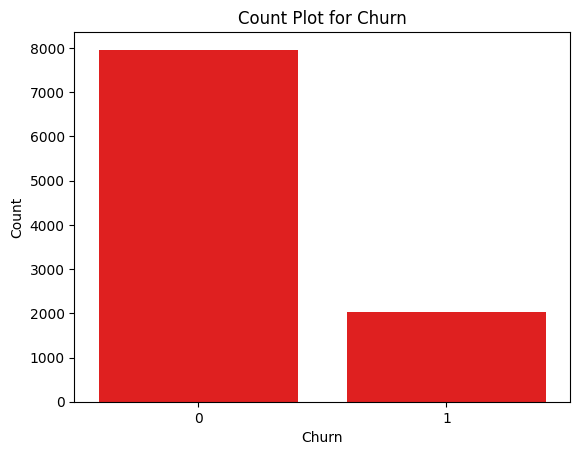

In [ ]:
sns.countplot(x='churn',data=data,color='red')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')
plt.show()

# **Interpretation:**
- this is couteplot that visualizes the **distribution**of the churn variable .
- there is  a **significant class imbalance**, the bar representing customers who did churn is much taller that the bar representing customers who churned .
- the no churn class (0) is the **dominant class**.
-the churn class (1) is the **minority class** .

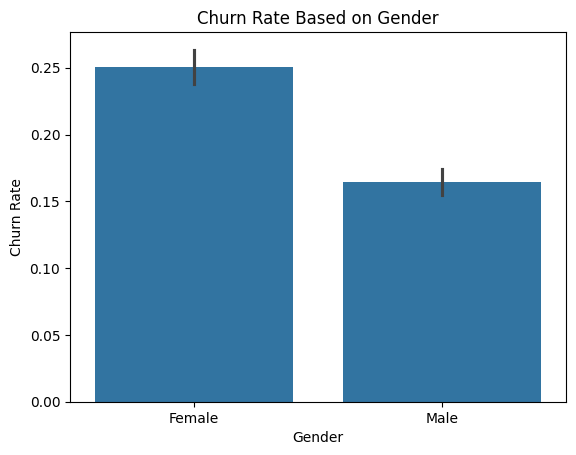

In [ ]:
#we will visulize the churn based on gender and country
sns.barplot(x='gender',y='churn',data=data)
plt.title('Churn Rate Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

# **Interpretation:**
- this plot is a barplot that compares the churn rate between male and female customers.
-Gender appears to be a factor influencing churn is this dataset
-higher churn rate for females :
  - Fenale churn rate : approximatly (24% -25%)
  - Mle Churn Rate : (16%- 17%)

- therefore ,females have a churn rate that is about 7-8 percentage points higher than males .

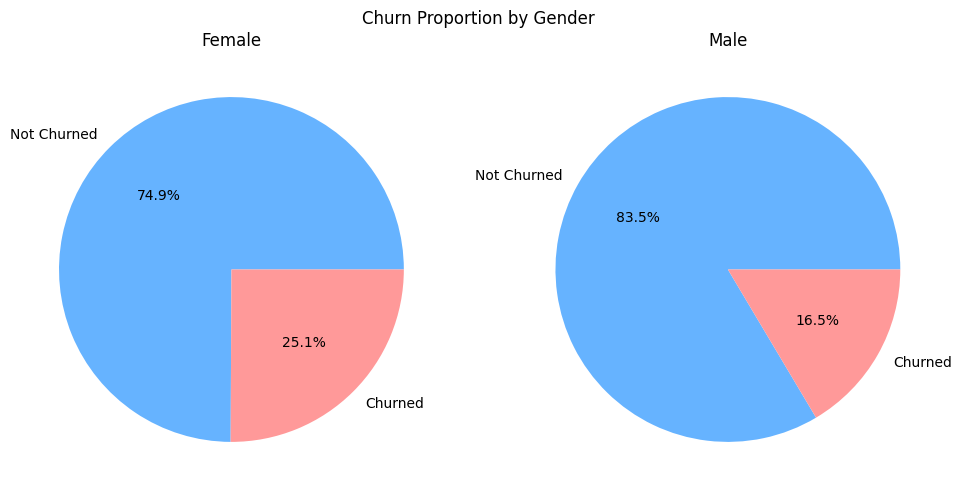

In [ ]:

churn_by_gender = data.groupby('gender')['churn'].value_counts(normalize=True).unstack()

# Create a pie chart for each gender
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Churn Proportion by Gender')

for i, gender in enumerate(churn_by_gender.index):
    axes[i].pie(churn_by_gender.loc[gender], labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
    axes[i].set_title(gender)

plt.tight_layout()
plt.show()

# **Interpretation:**
- this pie chart represents the** proportions of different rate** of churn and not churn for both gender (Male and Female).
- **higher** churn rate for F**emales with a percentage** of 25.1% compared to males  16.5%
- this is  a difference of 8.6 points .

In [ ]:
#we want to see how many countries we have
data.country.value_counts()

,count
country,
France,5014
Germany,2509
Spain,2477


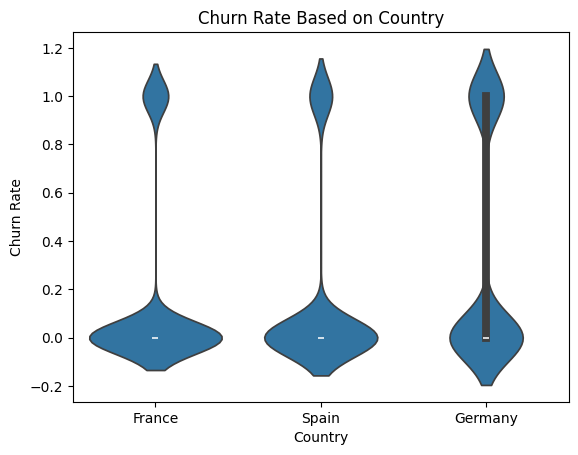

In [ ]:
sns.violinplot(x='country',y='churn',data=data)
plt.title('Churn Rate Based on Country')
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.show()

# **Interpreation:**
- this is violin plot that shows the **distribution of churn rate accross different countries** .
- Germnany has the **highest churn rate** ,since the voilin plot for germany is noticeably **taller and wide**r at the higher end of the churn rate scale .
- France and spain are more similar in shape and heights suggesting that their **churn rate distribution are closer.**
- However France distribution appears slightly wider.
- Distribution Difference :
  - **Germany** : the distribution is skewed towards higher churn rates , with a long tail extending towards lower values .
  -**France**: the distribution is more spread out , suggesting a wider range of churn rates .
  - **Spain** : the distribution is relatively concentrated , indicating thta churn rates are more clustered around a central value .

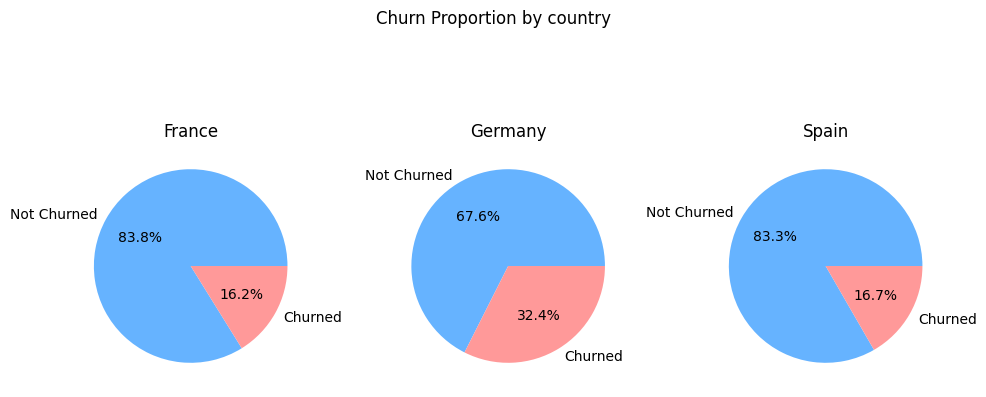

In [ ]:
churn_by_country = data.groupby('country')['churn'].value_counts(normalize=True).unstack()

# Create a pie chart for each gender
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle('Churn Proportion by country')

for i, country in enumerate(churn_by_country.index):
    axes[i].pie(churn_by_country.loc[country], labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
    axes[i].set_title(country)

plt.tight_layout()
plt.show()

# **Interpretation:**
- this pie chart shows the  **churn proportion** by country .
- **Germany' High churn rate** : the most significant observation is that germany has substantially higher churn rate (32.4%)  compared to both France (16.2%) and spain(16.7%).
- we might consider **demographic** and cultural differences that can influence churn .



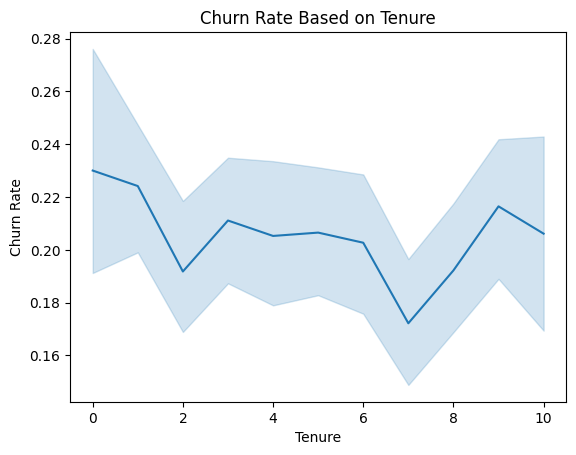

In [ ]:
#now let's study the relationship between tenure and churn
sns.lineplot(x='tenure',y='churn',data=data)
plt.title('Churn Rate Based on Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.show()

# **Interpretation:**
- this lineplot represents the **reltionship** between Tenure(the number of years a customer has been with the bank) and **Churn Rate**.
- the **blue line** shows the average churn rate for each tenure value .
- the **gray shaded**area represents the **confidence interval** around the churn rate ,it indicates the uncertainty in the estimated churn rate at each tenure value , a wider shaded area suggests more uncertainity .
- Flactuating churn rate across different tenure values ; there **is not a clear linear trend** .
- **higher churn** in early tenure (0-2 years) ; this suggest that **new customers are more likely to churn** than customers who have been with the bank for longer period.
- **lower churn** in Mid-Tenure : (3-6 years); the churn rate tends to be **lower in the mid-tenure range** ,this suggest that customers who have stayed with the bank for few years are more loyal and less likely to churn .
- **long-term customers might also churn**.
- there is **uncertainty in churn rate** estimates ,particularly at the extreme of tenure .  

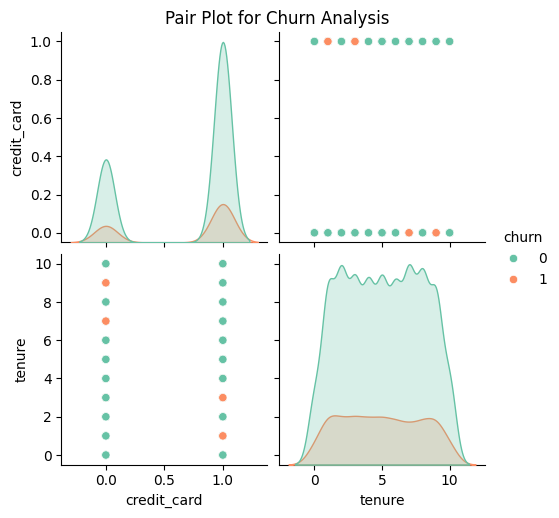

In [ ]:
df=data[['credit_card','tenure','churn']]
sns.pairplot(df,hue='churn',palette='Set2')
plt.suptitle('Pair Plot for Churn Analysis', y=1.02)
plt.show()

# **Interpretation:**
- this **pair plot** represents t**he relationship between credit_card , tenure and churn rate** .
- **distribution of credit_card**(the top left) ;shows to peaks ,one near to 0 and one near to 1 confirming that credit_card is  abinary variable , it suggests that there might be **higher proportion** of not churned customers (green ) with credit _card (near 1).
- **distribution of tenure**(bottom right) ; it suggests that churned customers might have a slightly different tenure distribution compared to non-churned customers (green) .
- the **scatter plot** (top-right)  is split by churn ,it doesn't show a strong correlation between credit_card and tenure.
- the **plot (bottom left)** provides some information about the relationship between tenure and credit_card and how it differs for churned and non-churned customers.


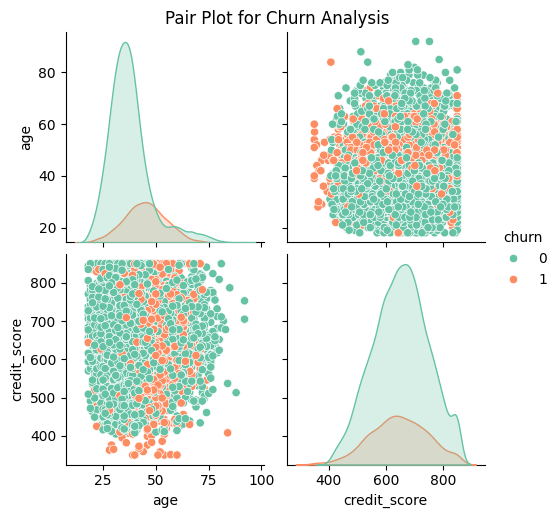

In [ ]:
df=data[['age','credit_score','churn']]
sns.pairplot(df,hue='churn',palette='Set2')
plt.suptitle('Pair Plot for Churn Analysis', y=1.02)
plt.show()


# **Interpretation:**
- **distribution of age** , the plot in the top left is split by churn , it suggests that younger customers mihgt have a slightly higher churn rate .
- **the distribution of credit_score** (bottom right) , the plot is split by churn and doesn't show a dramatic  difference , but there miht be a slightly higher proportion of churned customers with lower credit scores .
- **the scatter plot in the top right** shows how the distribution of points that differs for churned and non churned customers , for example , it appears to be higher concentration of churned cutomers in the younger age range .
- the **scatter plot in the bottom left** provides information about the relationship between credit_score and age and how it differs for churned and non-churned customers .



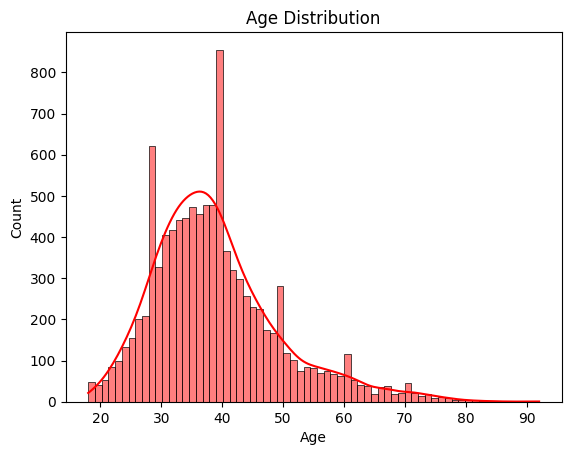

In [ ]:
sns.histplot(x='age',data=data,color='red',kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
#

# **Interpretation:**
- this is a **Histogramme** that visualize the distribution of single numerical value (age)
- **Peak  Around (30-40)**: the hustograme shows a clear peak in the age distribution around 30-40 years ,this indicates that the largest group of customers are in this age range .

In [ ]:
data['active_member'].value_counts()

,count
active_member,
1,5151
0,4849


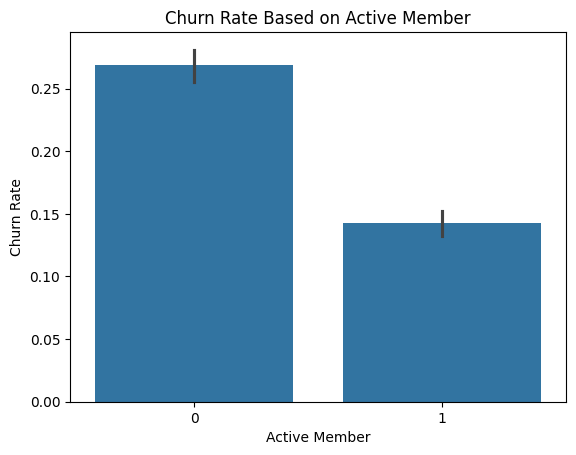

In [ ]:
# the relationship between active member and churn
sns.barplot(x='active_member',y='churn',data=data)
plt.title('Churn Rate Based on Active Member')
plt.xlabel('Active Member')
plt.ylabel('Churn Rate')
plt.show()

# **Interpretation:**
- this **barplot**describes the churn rate based on Active member .
- **Higher Churn rate for Inactive Members**: the bar for 0 (inactive members) is significantly taller than the bar for 1 (active members) , this indicates that **inactive members have much higher churn rate than active members**.

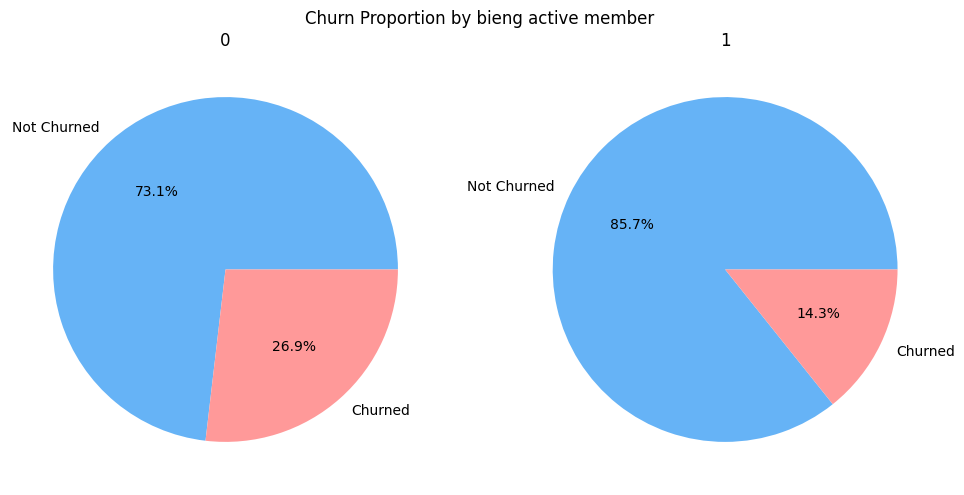

In [ ]:
#let us visulize it with piechart

churn_by_active = data.groupby('active_member')['churn'].value_counts(normalize=True).unstack()

# Create a pie chart for each gender
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Churn Proportion by bieng active member')

for i, active in enumerate(churn_by_active.index):
    axes[i].pie(churn_by_active.loc[active], labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=['#66b3f6', '#ff9999'])
    axes[i].set_title(active)

plt.tight_layout()
plt.show()


# **Interpretation:**
-those pie charts describe the **proprtion of churn rate** base on being **active**member or not .
- **Higher churn rate for Inactive members** : the most significant observation is that inactive members have a much higher churn rate **(26.9%)**compared to active members (14.3) , this is a difference of 12.6 percentage .
- the pie chart visully emphasize the difference , **the churned slice is much larger** in the inactive memeber pie chart that in the active member pie chart .
- In summary Active members are **significantly less likely to churn**.


<Axes: xlabel='country', ylabel='Count'>

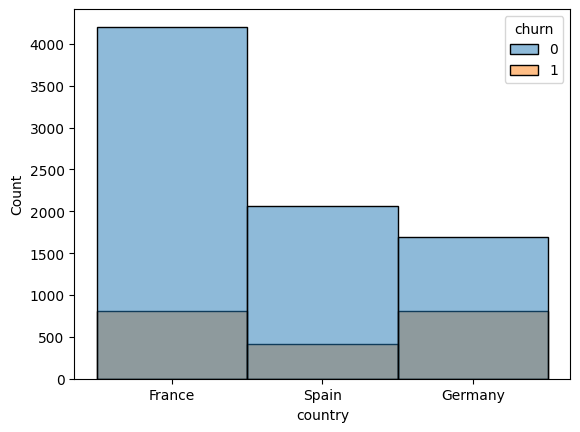

In [ ]:
sns.histplot(data=data,
    x="country",
    hue="churn")

# **Interpretation:**
- this hisplot shows the relationhsip between **the churn rate and and coutry** .
- **Germany has the highest** churn count : despite having fewer overall customers than france and spain , germany has the highest count of churned customer .
- **France has the most customers** : france has the highest overall count of customers compared to spain and germany .
- **France and Spain have a much lower** absolute count of churned customers and a higher count of non-churned customers,indicating greater customer stability.

<Axes: xlabel='credit_score', ylabel='Density'>

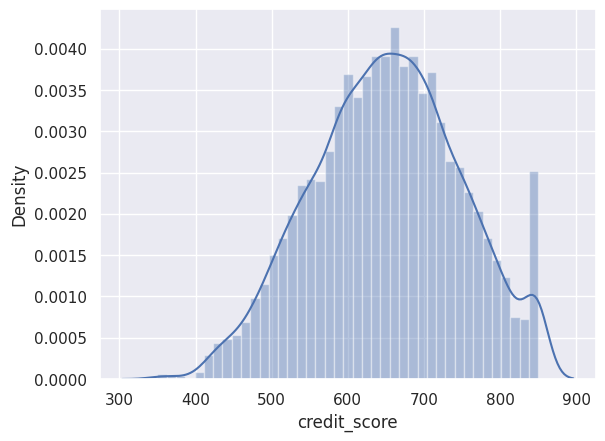

In [ ]:
sns.set(style="darkgrid")

sns.distplot( a=data["credit_score"],hist=True, kde=True, rug=False )

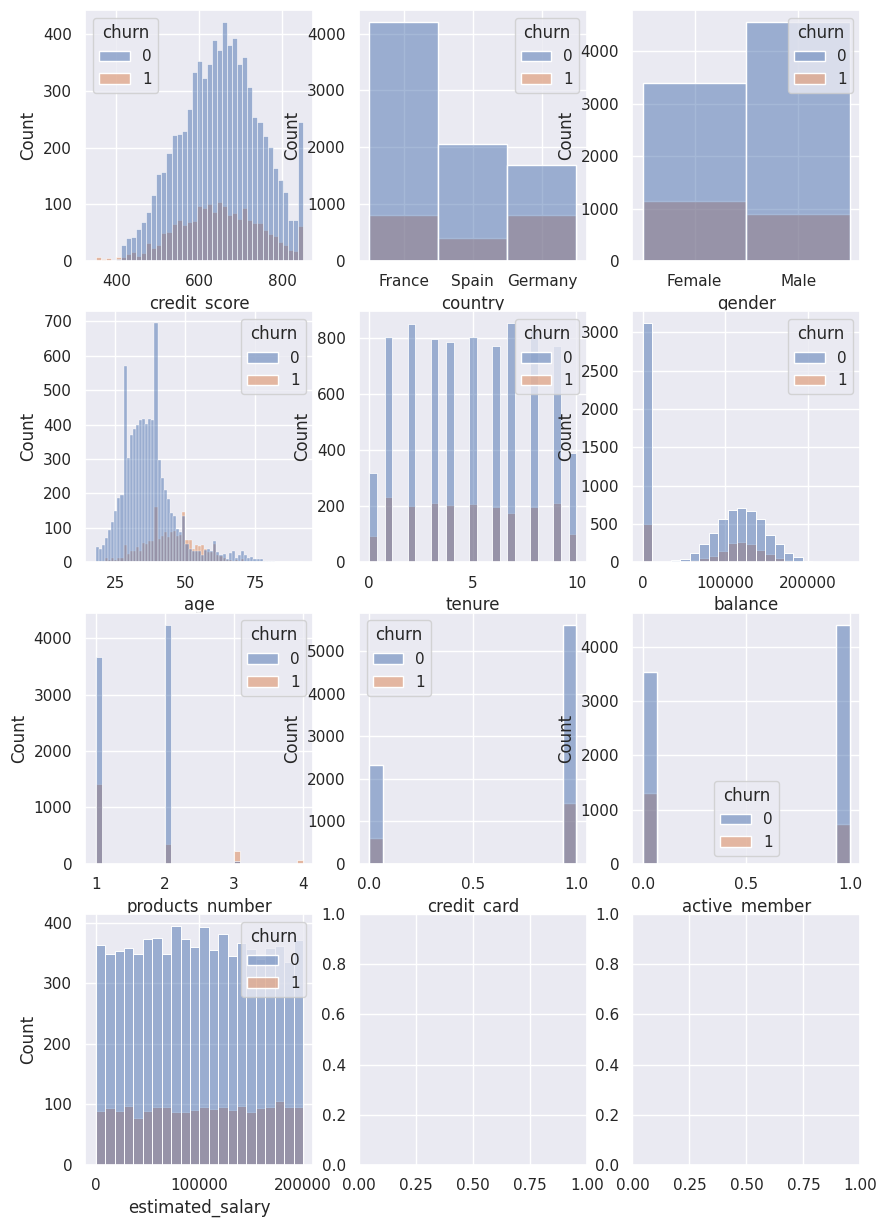

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10,15))
axs=axs.flat
for i in range(len(data.columns)-1):
    sns.histplot(data=data, x=data.columns[i],hue="churn",ax=axs[i])

# **Interpretation:**
- this histograms shows the distribution of different feature broken down by the churn status .
- **the credit score distribution looks roughly normal**, centred around **600-700** , so the **churned customers** might have a slightly **lower average credit** score compared to non-churned customer .
-**Germany has higher proportion** of churned customers compared to france and spain .
- **Females have a slightly** higher proportion of churned customers compared to males .
- **younger customers** might have a slightly higher proportion of churned customers .
- **customer with a balance of 0** have a significantly higher proportion of churned customers ,while **customers with non-zero** balances are much less likely to churn .


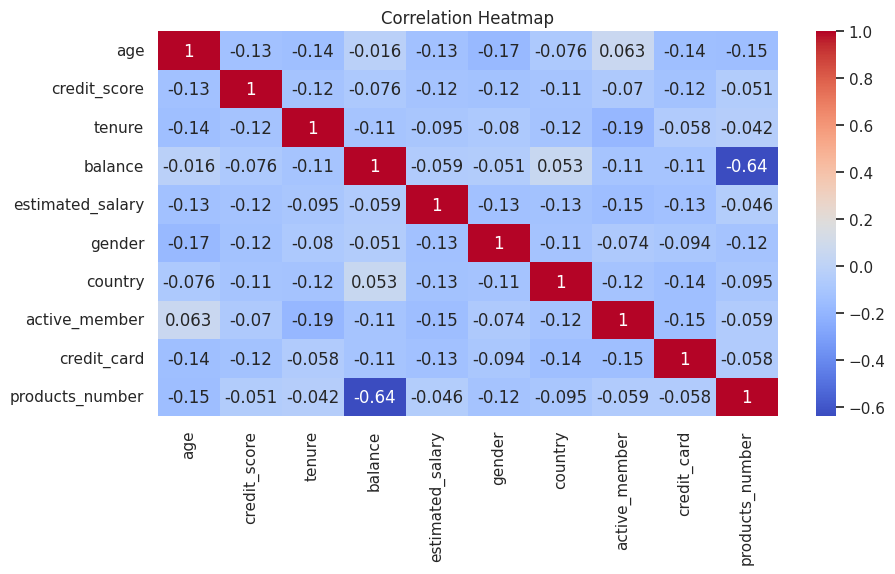

In [ ]:
cor=data[['age','credit_score','tenure','balance','estimated_salary','gender','country','active_member','credit_card','products_number']].corr()

correlation_matrix = cor.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Interpretation:**
- this is a  heatmap correlation heatmap that show the  correlation coeficient between different features.
- we can notice that most **correlation are weak**,indicating that the variables are relatively indipedent of each other .
- **Balance and products_number (-0.64)** , this shows a moderatly strong negative correlation , so customers with higher balances tend to have fewer products , and vice versa.
- **Tenure and active_member(-0.19)** : there is a moderate negative correlation , so suctomers with longer tenures are less likely to be active members.
- **Age and gender(-0.17)** : there is moderate negative correlation , older customers are less likely to be female.
- **age and credit_card (-0.14)** : there is a moderate negative correlation ,older customers are less likely to have  credit card .
- **credit score and tenure (-0.12)** : there is  a moderate negative correlation , customers with higher credit scores tend to have shorter tenures.

# **Data Encoding**


In [ ]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Note:
-  **columns : country and gender** they have **categorical** values
- we are going to **encode** them using one hot encoding  or label encoding.
- Data encoding should be done before trainig



In [ ]:
#we can normilize the columns estimated salary and balance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[['estimated_salary','balance']]=scaler.fit_transform(data[['estimated_salary','balance']])

In [ ]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,-1.225848,1,1,1,0.021886,1
1,608,Spain,Female,41,1,0.117350,1,0,1,0.216534,0
2,502,France,Female,42,8,1.333053,3,1,0,0.240687,1
3,699,France,Female,39,1,-1.225848,2,0,0,-0.108918,0
4,850,Spain,Female,43,2,0.785728,1,1,1,-0.365276,0


In [ ]:
#we will encode the columns country and gender using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['country']=le.fit_transform(data['country'])
data['gender']=le.fit_transform(data['gender'])



In [ ]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,608,2,0,41,1,0.117350,1,0,1,0.216534,0
2,502,0,0,42,8,1.333053,3,1,0,0.240687,1
3,699,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,850,2,0,43,2,0.785728,1,1,1,-0.365276,0


In [ ]:
#we will  split our data into training and test
x=data.drop('churn',axis=1)
y=data['churn']

print(x.shape)
print(y.shape)


(10000, 10)
(10000,)


# **Featue Scaling**
- we should normalize the dataset  because:
  - credit_score: values in the hundreds
  - age : values in tens
  - tenure : values in single digits
  - balance : values in the range of -1.22 to 1.33.

- Normalizing the features can lead to Improves Model performance and better accuracy.


In [ ]:
# we are going to use z-score Scaling : have a mean of 0 and standard deviation of 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_columns=['credit_score','age','tenure','balance','estimated_salary']
data[numerical_columns]=scaler.fit_transform(data[numerical_columns])


In [ ]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.326221,0,0,0.293517,-1.041760,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,-1.387538,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,1.032908,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,-1.387538,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,-1.041760,0.785728,1,1,1,-0.365276,0


# **Model Selection**
- Churn prediction is a binary classification Problem ,(churn or nOt churn)
- we are going to train our model using 3 algorithms:
    - Logistic Regression
    - Svm
    - Random Forest
    - Xgboost classifier

- we have already plot the churn target variable ,and we can conclude that the **dataset is imbalanced** , so we can implement either **Oversampling/Undersampling techniques** to balance the dataset before training or use **algorithms that support Imbalanced datasets** .
- we are going to use the second  approach , and we have to evaluate the model performance based on **precesion ,recall , F1 score ,AUC-Score**,so we shouldn't rely on accuracy as it can be misleading .
  

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


**1-Logistic Regression**

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
#print the AUC-roc because the dataset is imbalanced
print(roc_auc_score(y_test,y_pred))

0.815
[[1554   53]
 [ 317   76]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.59      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.78      2000

0.5802017572610921


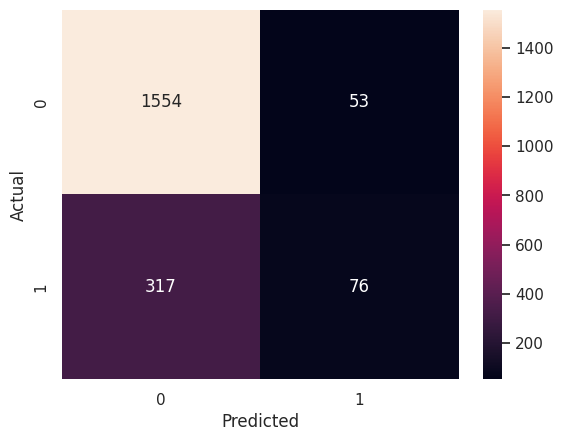

In [ ]:
#we will print confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**2-Support Vector machine**

In [ ]:
#we will try with SVM
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.8035
[[1607    0]
 [ 393    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

0.5


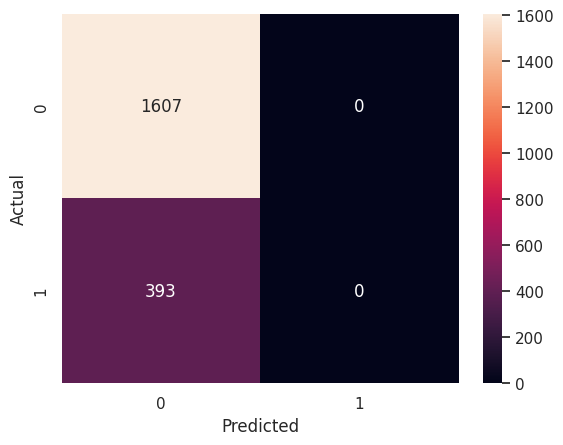

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**3-Random Forest:**

In [ ]:
# we are goint to use Random forest to train the model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.866
[[1552   55]
 [ 213  180]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.7118950013538099


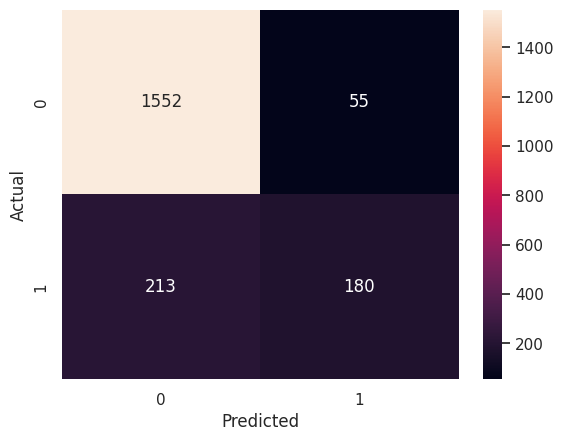

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**3-Xgboost classifier**


In [ ]:
# we are going to use Xgboost classifier to train our model
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.861
[[1523   84]
 [ 194  199]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

0.727045005074808


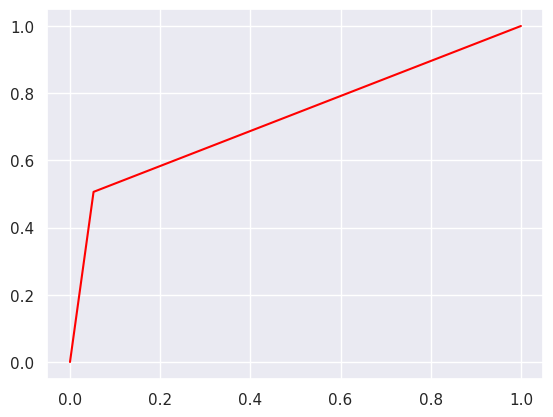

In [ ]:
#we will print the ROC-AUC curve for Xgboost algorithm
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color='red')

In [ ]:
import pandas as pd

# Example results for each algorithm
results = {
    'Logistic Regression': {'Recall': 0.19, 'F1-Score': 0.29, 'ROC-AUC': 0.58},
    'SVM': {'Recall': 0, 'F1-Score': 0, 'ROC-AUC': 0.5},
    'Random Forest': {'Recall': 0.46, 'F1-Score': 0.57, 'ROC-AUC': 0.71},
    'XGBoost': {'Recall': 0.51, 'F1-Score': 0.59, 'ROC-AUC': 0.72}
}

# Convert to DataFrame and transpose
results_df = pd.DataFrame(results).T

# Print the performance metrics
print("Comparison of Algorithms:")
print(results_df)

Comparison of Algorithms:
                     Recall  F1-Score  ROC-AUC
Logistic Regression    0.19      0.29     0.58
SVM                    0.00      0.00     0.50
Random Forest          0.46      0.57     0.71
XGBoost                0.51      0.59     0.72


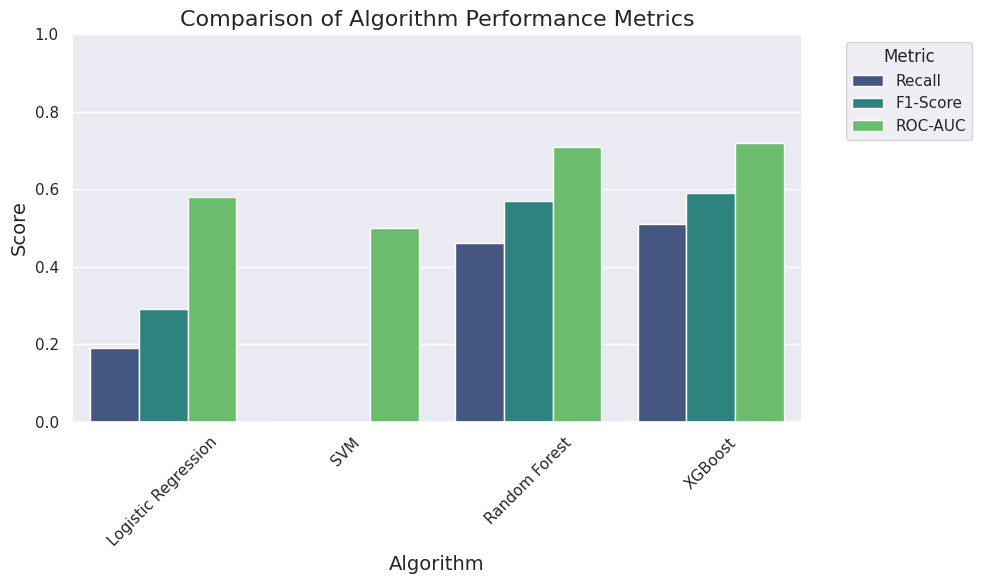

In [ ]:

# Reset index to make algorithms a column
results_df = results_df.reset_index().rename(columns={'index': 'Algorithm'})

# Melt the DataFrame for easier plotting
results_melted = results_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Score', hue='Metric', data=results_melted, palette='viridis')

# Add labels and title
plt.title('Comparison of Algorithm Performance Metrics', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.xticks(rotation=45)  # Rotate algorithm names for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# **Conclusion:**
- **logistic regression performs poorly** ,it has very low recall , meaning it's missing a large proportion of churners, the low F1 score and poor ROC-Score and poor ROC-AUC
-**SVM performs the worst** , it predicts no churners correctly (recall=0) ,resulting in a zero F1-score , the ROC-AUC of 0.5 indicates it's no better than a random guess.
- **Random Forest performs significantly better** than logistic regression and SVM , it has a moderate recall and F1-score ,indicating it's capturing a reasonable number of churners , the ROC -AUC of 0.71 is also decent.
- **Xgboost performs the best among four algorithms** , it has the highest recall and F1score ,meaning it's capturing the most churners while maintainnig a good balance between precision and recall , the ROC-AUC of 0.72 is also the best .



# **Note:**
- in order to improve the performance of the algorithms ,we can use techniques like **oversampling ,undersampling or SMOTE** to address the imbalanced datasets.
